1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [3]:
import pandas as pd
file_path = '/Users/caolu/Desktop/open_rank_20236.csv'
def Analyze(filepath):
    df = pd.read_csv(file_path)
    df_top100 = df.nsmallest(100, 'rank')
    max_value = df_top100['value'].max()
    min_value = df_top100['value'].min()
    mean_value = df_top100['value'].mean()
    median_value = df_top100['value'].median()
    
    # 输出结果
    print(f"排名前100的项目中,value 列的统计信息如下：")
    print(f"最大值：{max_value}")
    print(f"最小值：{min_value}")
    print(f"均值：{mean_value}")
    print(f"中位数：{median_value}")
Analyze(file_path)

排名前100的项目中,value 列的统计信息如下：
最大值：1394.45
最小值：200.68
均值：346.9679
中位数：273.66999999999996


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [4]:
import pandas as pd
file_path='/Users/caolu/Desktop/activity_2022.csv'
df = pd.read_csv(file_path)
df['growth_rate'] = (df['20227_value'] - df['20221_value']) / df['20221_value']
average_growth_rate = df['growth_rate'].mean()
print(f"所有项目的平均增长率为：{average_growth_rate:.4f}")

所有项目的平均增长率为：0.0398


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [ ]:
import pandas as pd


china_df = pd.read_csv('/Users/caolu/Desktop/china_2022.csv')
global_df = pd.read_csv('//Users/caolu/Desktop/global_2022.csv')
china_stats = china_df[['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']].agg(['mean', 'sum'])
global_stats = global_df[['issue_comment', 'open_issue', 'open_pull', 'review_comment', 'merged_pull', 'value']].agg(['mean', 'sum'])
china_stats
global_stats

      issue_comment  open_issue  open_pull  review_comment  merged_pull  \
mean        61205.5      9169.2    16912.7         19857.5      13764.1   
sum        612055.0     91692.0   169127.0        198575.0     137641.0   

           value  
mean   40269.534  
sum   402695.340  


,issue_comment,open_issue,open_pull,review_comment,merged_pull,value
mean,341409.4,43300.2,83423.0,120392.1,62472.0,215855.491
sum,3414094.0,433002.0,834230.0,1203921.0,624720.0,2158554.910


全球前十企业的开源活跃度（如问题评论数、pull请求等）显著高于中国前十企业，表明全球的顶尖企业在开源领域的贡献和活跃度总体上较高。

4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

设定事件A：“项目带有HTML/Markdown标签”
设定事件B：“该项目是非软件型项目”
P（B）= 0.25  P（A｜B）=0.85 P（A｜非B）=0.1
P（A）= P（A｜B）·P（B）+ P（A｜非B）·P（非B）
     = 0.85*0.25 +0.1*0.75 =0.2875
P（B｜A）=P（A｜B）*P（B）/P（A）=0.85 * 0.25/0.2875 ≈0.7391

5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

设定事件C：“项目是由 JavaScript 语言编写的”
设定事件D：“它是工具组件型项目”
P（D）=0.5 P（C｜D）=0.35 P（C｜非D）=0.1
P（C）=P（C｜D）*P（D）+P（C｜非D）*P（非D）
     =0.35*0.5+0.1*0.5=0.225
P（D｜C）=P（D）*P（C｜D）/P（C）=0.5*0.35/0.225 ≈0.7778

6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

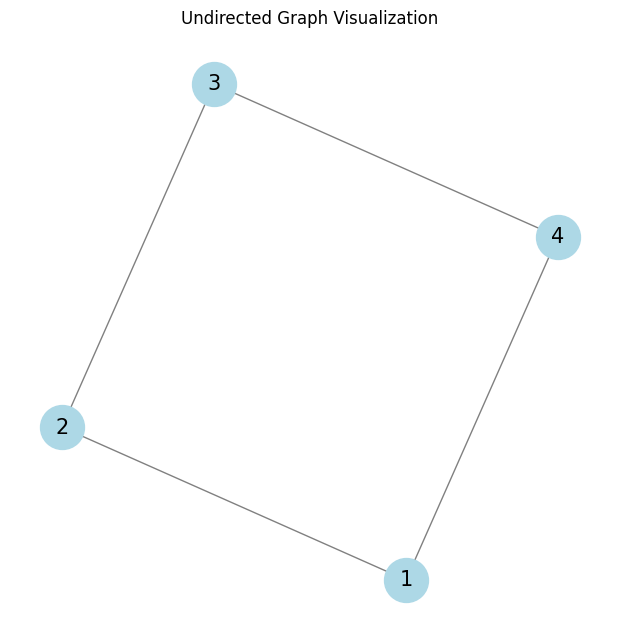

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edge)

plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=15)
plt.title("Undirected Graph Visualization")
plt.show()


7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

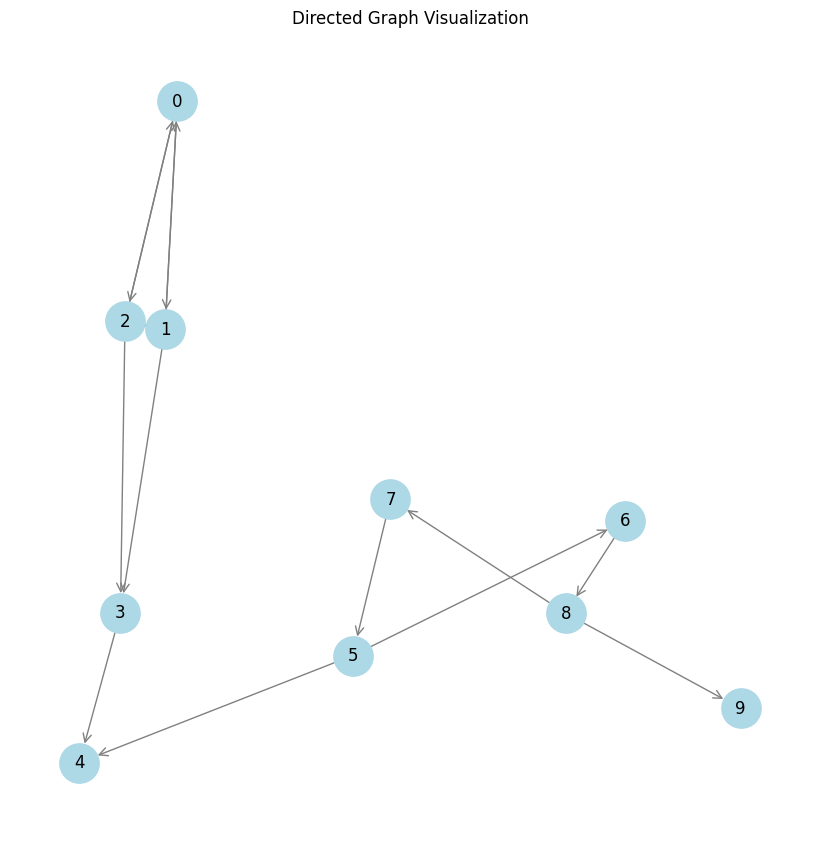

In [12]:
import networkx as nx
import matplotlib.pyplot as plt


users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]


G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)


plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)  # 自动布局
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", 
        node_size=800, font_size=12, arrowstyle='->', arrowsize=15)
plt.title("Directed Graph Visualization")
plt.show()


8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

Node 0: PageRank = 0.0950
Node 1: PageRank = 0.1055
Node 2: PageRank = 0.1055
Node 3: PageRank = 0.0950
Node 4: PageRank = 0.1593
Node 5: PageRank = 0.1020
Node 6: PageRank = 0.0786
Node 7: PageRank = 0.0786
Node 8: PageRank = 0.1020
Node 9: PageRank = 0.0786


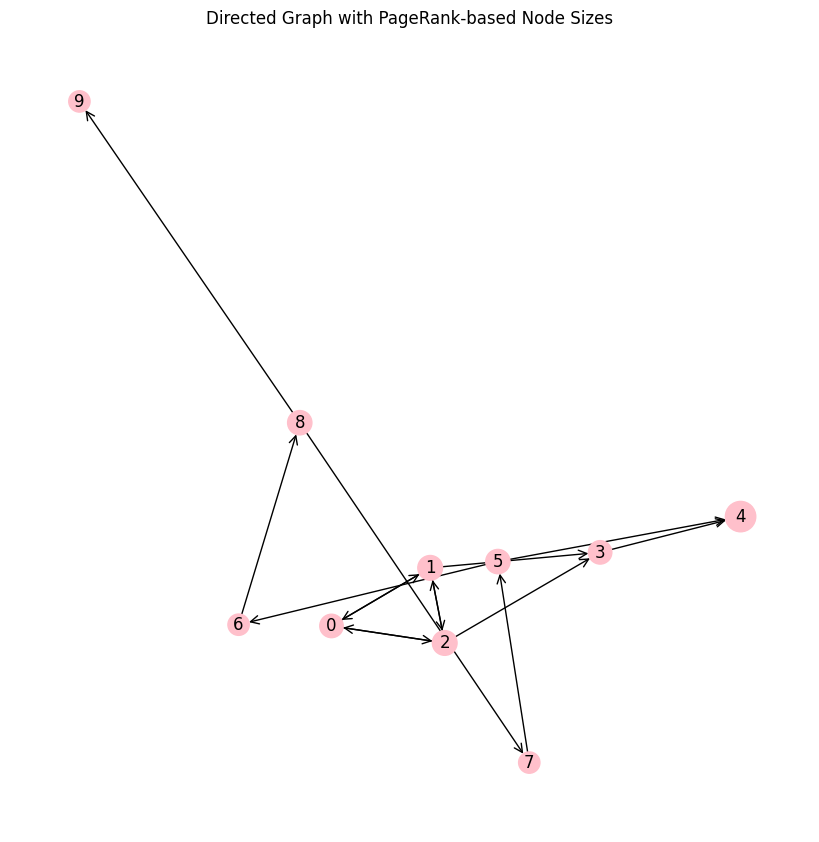

In [18]:
import networkx as nx
import matplotlib.pyplot as plt


users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]


G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank_values = nx.pagerank(G)


for node, rank in pagerank_values.items():
    print(f"Node {node}: PageRank = {rank:.4f}")


node_sizes = [pagerank_values[node] * 3000 for node in G.nodes]


plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_color="pink", edge_color="black", 
        node_size=node_sizes, font_size=12, arrowstyle='->', arrowsize=15)
plt.title("Directed Graph with PageRank-based Node Sizes")
plt.show()
